In [2]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#Univariate analysis of the independent variable

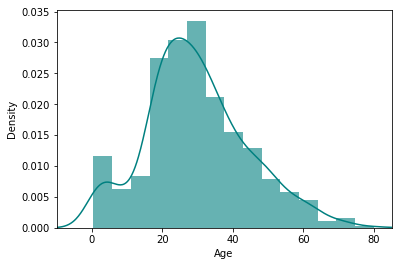

In [12]:
ax = train_df["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df["Age"].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [13]:
combine = [train_df, test_df]

In [14]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [18]:
categorical = train_df.dtypes[train_df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turja, Miss. Anna Sofia",male,347082,G6,S
freq,1,577,7,4,644


In [23]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


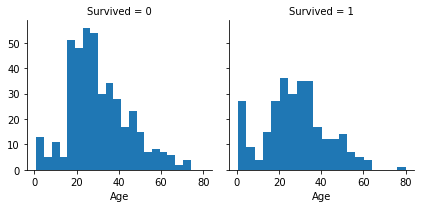

In [26]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age' , bins = 20)

/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


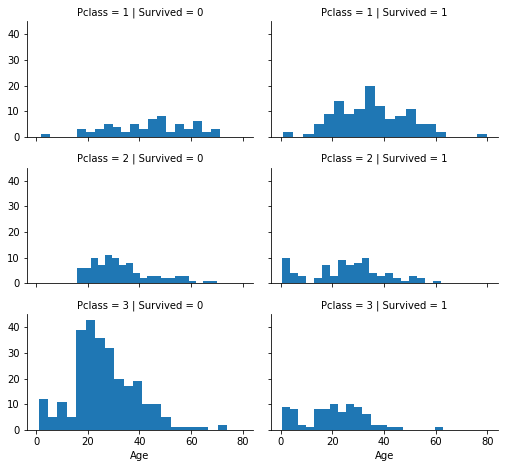

In [29]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size= 2.2, aspect= 1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

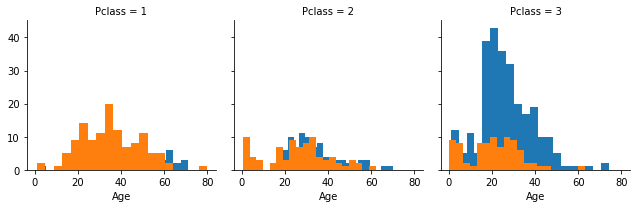

In [30]:
grid = sns.FacetGrid(train_df, col = 'Pclass', hue='Survived')
grid.map(plt.hist, 'Age', bins = 20)

/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


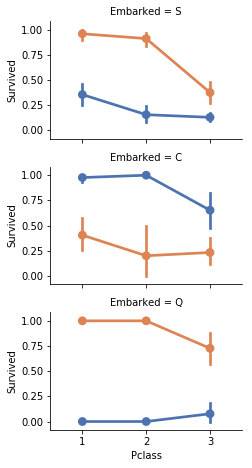

In [36]:
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette = 'deep')
#grid.add_legend()

/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


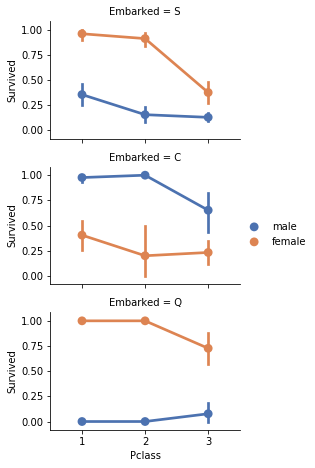

In [38]:
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette = 'deep')
grid.add_legend()

/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shwethamg/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


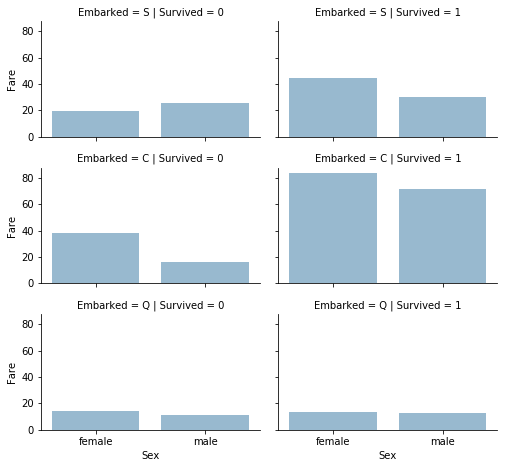

In [40]:
#correlation
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex','Fare',alpha = 0.5, ci=None)
grid.add_legend()

In [41]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)
test_df = test_df.drop(['Ticket','Cabin'],axis = 1)
print('After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 12) (418, 11)


In [ ]:
# creating new feature

In [ ]:
# The RegEx pattern matches the first word which ends with dot character
#the expand-false flag returns a Dataframe

In [43]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand = False)
    
pd.crosstab(combine[0]['Title'],combine[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#pd.crosstab(dataset['Title'],dataset['Sex'])

In [44]:
for d in combine:
    d['Title'] = d['Title'].replace(['Lady','Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major','Rev','Sir','Jonkheer'], 'Rare')
    d['Title'] = d['Title'].replace('Mlle','Miss')
    d['Title'] = d['Title'].replace('Ms','Miss')

In [46]:
combine[0][['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
2,Mme,1.000000
4,Mrs,0.792000
1,Miss,0.702703
0,Master,0.575000
5,Rare,0.347826
3,Mr,0.156673


In [49]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare': 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)